<a href="https://colab.research.google.com/github/MaliciousCommit/Game/blob/master/Birds_classifier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt


In [0]:
!unzip '/content/drive/My Drive/100-bird-species.zip' -d '/content/'


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/RUFUOS MOTMOT/049.jpg  
  inflating: /content/train/RUFUOS MOTMOT/050.jpg  
  inflating: /content/train/RUFUOS MOTMOT/051.jpg  
  inflating: /content/train/RUFUOS MOTMOT/052.jpg  
  inflating: /content/train/RUFUOS MOTMOT/053.jpg  
  inflating: /content/train/RUFUOS MOTMOT/054.jpg  
  inflating: /content/train/RUFUOS MOTMOT/055.jpg  
  inflating: /content/train/RUFUOS MOTMOT/056.jpg  
  inflating: /content/train/RUFUOS MOTMOT/057.jpg  
  inflating: /content/train/RUFUOS MOTMOT/058.jpg  
  inflating: /content/train/RUFUOS MOTMOT/059.jpg  
  inflating: /content/train/RUFUOS MOTMOT/060.jpg  
  inflating: /content/train/RUFUOS MOTMOT/061.jpg  
  inflating: /content/train/RUFUOS MOTMOT/062.jpg  
  inflating: /content/train/RUFUOS MOTMOT/063.jpg  
  inflating: /content/train/RUFUOS MOTMOT/064.jpg  
  inflating: /content/train/RUFUOS MOTMOT/065.jpg  
  inflating: /content/train/RUFUOS MOTMOT/066.jpg  
  inflating: 

In [0]:
img  = plt.imread( '/content/train/ALBATROSS/001.jpg')
img.shape

(224, 224, 3)

In [0]:
from __future__ import print_function, division
from builtins import range, input
import tensorflow.keras
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import numpy as np
from glob import glob

In [0]:
IMAGE_SIZE = [224, 224]
epochs = 1000
batch_size = 50

In [0]:
train_path ='/content/train'
valid_path = '/content/valid'

image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

folders = glob(train_path + '/*')


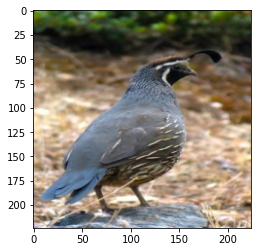

In [0]:
plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.show()


In [0]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE + [3], pooling=None)

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
for layer in inception.layers:
  layers.trainable = False

In [0]:
inception.summary()
from tensorflow.keras import layers

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
for layer in inception.layers:
  layers.trainable = False
last_layer = inception.get_layer('mixed9')
last_output = last_layer.output

In [0]:
x = layers.Conv2D(32, (3, 3), activation='relu')(last_output)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3),padding="same", activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
prediction = layers.Dense(len(folders), activation='softmax')(x)
model = Model(inputs= inception.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])


In [0]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

Found 875 images belonging to 175 classes.
{'ALBATROSS': 0, 'ALEXANDRINE PARAKEET': 1, 'AMERICAN AVOCET': 2, 'AMERICAN BITTERN': 3, 'AMERICAN COOT': 4, 'AMERICAN GOLDFINCH': 5, 'AMERICAN KESTREL': 6, 'AMERICAN PIPIT': 7, 'AMERICAN REDSTART': 8, 'ANHINGA': 9, 'ANNAS HUMMINGBIRD': 10, 'ARARIPE MANAKIN': 11, 'BALD EAGLE': 12, 'BALTIMORE ORIOLE': 13, 'BANANAQUIT': 14, 'BAR-TAILED GODWIT': 15, 'BARN OWL': 16, 'BARN SWALLOW': 17, 'BAY-BREASTED WARBLER': 18, 'BELTED KINGFISHER': 19, 'BIRD OF PARADISE': 20, 'BLACK FRANCOLIN': 21, 'BLACK SKIMMER': 22, 'BLACK SWAN': 23, 'BLACK THROATED WARBLER': 24, 'BLACK VULTURE': 25, 'BLACK-CAPPED CHICKADEE': 26, 'BLACK-NECKED GREBE': 27, 'BLACKBURNIAM WARBLER': 28, 'BLUE GROUSE': 29, 'BLUE HERON': 30, 'BOBOLINK': 31, 'BROWN THRASHER': 32, 'CACTUS WREN': 33, 'CALIFORNIA CONDOR': 34, 'CALIFORNIA GULL': 35, 'CALIFORNIA QUAIL': 36, 'CAPE MAY WARBLER': 37, 'CARMINE BEE-EATER': 38, 'CASPIAN TERN': 39, 'CASSOWARY': 40, 'CHARA DE COLLAR': 41, 'CHIPPING SPARROW': 42,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -0.9995885 max: 0.9600121


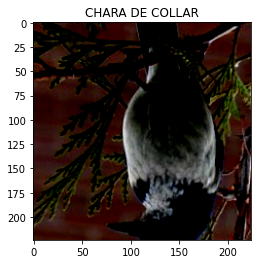

In [0]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break


In [0]:
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Found 23657 images belonging to 175 classes.
Found 875 images belonging to 175 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1000
471/471 [==============================] - 345s 733ms/step - loss: 5.1737 - acc: 0.0096 - val_loss: 5.1738 - val_acc: 0.0059
Epoch 2/1000
471/471 [==============================] - 344s 731ms/step - loss: 5.1318 - acc: 0.0148 - val_loss: 16.1162 - val_acc: 0.0059
Epoch 3/1000
471/471 [==============================] - 344s 731ms/step - loss: 4.7803 - acc: 0.0268 - val_loss: 5.0509 - val_acc: 0.0188
Epoch 4/1000
471/471 [==============================] - 345s 732ms/step - loss: 4.4359 - acc: 0.0436 - val_loss: 4.5753 - val_acc: 0.0306
Epoch 5/1000
471/471 [==============================] - 345s 733ms/step - loss: 4.2502 - acc: 0.0547 - val_loss: 4.6394 - val_acc: 0.0353
Epoch 6/1000
471/471 [==============================] - 346s 735ms/step - loss: 4.1501 - acc: 0.0624 - val_loss: 4.5267 - val_acc: 0.0400
Epoch 7

In [0]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)


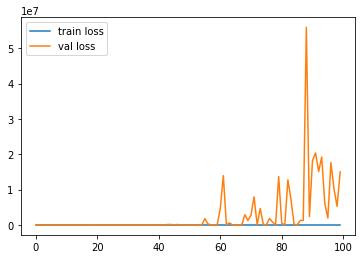

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


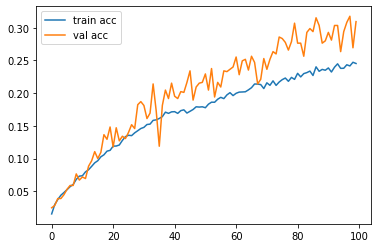

In [0]:
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()